**Monty Hall Problem**
There are 3 doors. One door has a car behind it and the remaiing two have a goat behind it. The following sequence of steps happen:
1. Contestant chooses a door randomly with equal probability.
2. The host opens one of the doors out of the two remaning to reveal a goat
3. The host gives the contestant an option to swicth his choice (i.e. Stick with choice made in Step 1 or choose the one remaning door)

Implicit assumptions in this problem:
1. The host knows the door behind which there is the car.
2. In step 2, host always opens the door which has a goat (never the car)
3. In case both the remaining doors in step 2 have goats, the host chooses a door to reveal randomly with equal probability.
4. Obviously, the contestant in interested in the car, not the goat

Question: Should the contestant switch?

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy.stats as stats
from operator import itemgetter

In [ ]:
def execute_month_hall_problem(iterations = 1000, door_count = 3):

  def set_up_monty_hall_game(door_count = 3):
    return random.sample(['C'] + ['G']*(door_count-1), door_count)

  number_wins_with_switch = 0
  number_wins_without_switch = 0

  for index in range(iterations):
    ## Step 0: Set up the game
    game = set_up_monty_hall_game(door_count = door_count)
    car_known_to_host_door_index = game.index('C')

    ## Step 1: Contestant chooses a door randomly
    contestant_choice_door_index = random.choice(range(door_count))

    ## Step 2: Host reveals one of the remaining doors
    if car_known_to_host_door_index == contestant_choice_door_index:
      ## Case 1: Both the remaning doors have goats. Hence the host chooses the door to reveal with equal probability.
      door_index_list = list(range(door_count))
      door_index_list.remove(contestant_choice_door_index)
      host_reveal_goat_door_index = random.choice(door_index_list)
    else:
      ## Case 2: Contestant chose the door with a goat. This means that the 2 remaning doors have a car and a goat. The host has option to choose only 1 (with goat) door to reveal
      door_index_list = list(range(door_count))
      door_index_list.remove(contestant_choice_door_index)
      door_index_list.remove(car_known_to_host_door_index)
      host_reveal_goat_door_index = door_index_list[0]


    ## Case 1: Contestant does not switch
    number_wins_without_switch = number_wins_without_switch+1 if contestant_choice_door_index == car_known_to_host_door_index else number_wins_without_switch

    ## Case 2: Contestant makes the switch
    door_index_list = list(range(door_count))
    door_index_list.remove(contestant_choice_door_index)
    door_index_list.remove(host_reveal_goat_door_index)

    new_contestant_choice =  door_index_list[0]
    number_wins_with_switch = number_wins_with_switch + 1 if new_contestant_choice == car_known_to_host_door_index else number_wins_with_switch

  return {'P_win_with_switch':number_wins_with_switch/iterations, 'P_win_without_switch':number_wins_without_switch/iterations}


In [ ]:
monty_hall_probability_dict_list = [execute_month_hall_problem(iterations = 1000, door_count = 3) for i in range(100)]

In [ ]:
monty_hall_probability_win_with_switch = list(map(itemgetter('P_win_with_switch'), monty_hall_probability_dict_list))
monty_hall_probability_win_without_switch = list(map(itemgetter('P_win_without_switch'), monty_hall_probability_dict_list))

In [ ]:
prob_df_with_switch = pd.DataFrame({'probability_win':monty_hall_probability_win_with_switch, 'strategy':'Contestant should switch'})
prob_df_without_switch = pd.DataFrame({'probability_win':monty_hall_probability_win_without_switch, 'strategy':'Contestant should not switch'})
prob_df = pd.concat([prob_df_with_switch, prob_df_without_switch], axis=0).reset_index(drop=True)

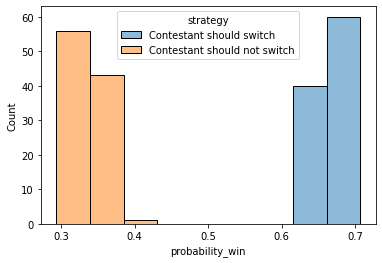

In [ ]:
sns.histplot(data=prob_df, x='probability_win', hue='strategy')

In [ ]:
stats.ttest_1samp(a=monty_hall_probability_win_with_switch, popmean=2/3)

Ttest_1sampResult(statistic=0.6011128846623238, pvalue=0.549138680978057)

In [ ]:
stats.ttest_1samp(a=monty_hall_probability_win_without_switch, popmean=1/3)

Ttest_1sampResult(statistic=-0.6011128846621919, pvalue=0.5491386809781444)

It can be clearly seen from the graph above that the probability of winning when the person decides to switch > probability of winning when the person does not switch.

Using the T test, we can see that for the case when the person makes a switch, the data does not provide enough evidence to reject the null hypothesis that probability = 2/3

Similarly, we can see that when the person does not make a switch, the data does not provide enough evidence to reject the null hypothesis that the probability = 1/3

**Simpsons paradox**: Each jar contains orange and yellow jellybeans. Consider following
1.   Set 1: 2 jars. Jar 1 has higher probability of orange jellybeans as compared to Jar 2
2.   Set 2: 2 jars. Jar 1 has higher probability of orange jellybeans as compared to Jar 2

We can have a scenario where probability of orange jellybeans in jar 1 (set1 and set2) can be lesser than probability of orange jellybeans in jar 2 (set1 and set2). This is called SImpsons paradox

In terms of events:

**O: Event that we get orange jellybean**

**S: Set 1**

**J: Jar 1**

P(O|S, J) > P(O|S, J_comp)

P(O|S_comp, J) > P(O|S_comp, J_comp)

BUT

P(O|J) < P(O|J_comp)

In this example S is confounder variable


In [ ]:
class JellyBean:
  def __init__(self, value, set_number, jar_number):
    self.value = value
    self.set_number = set_number
    self.jar_number = jar_number

In [ ]:
# S1_J1_list = [JellyBean(val, 'S1', 'J1') for val in ['O']*6 + ['Y']*4]
# S1_J2_list = [JellyBean(val, 'S1', 'J2') for val in ['O']*4 + ['Y']*6]
# S2_J1_list = [JellyBean(val, 'S2', 'J1') for val in ['O']*4 + ['Y']*1]
# S2_J2_list = [JellyBean(val, 'S2', 'J2') for val in ['O']*14 + ['Y']*6]
# complete_list = S1_J1_list + S1_J2_list + S2_J1_list + S2_J2_list
# random.shuffle(complete_list)

In [ ]:
def simpsons_paradox_example(iterations=1000):

  ## Create a list of jellybeans
  S1_J1_list = [JellyBean(val, 'S1', 'J1') for val in ['O']*70 + ['Y']*20]
  S1_J2_list = [JellyBean(val, 'S1', 'J2') for val in ['O']*3+ ['Y']*7]
  S2_J1_list = [JellyBean(val, 'S2', 'J1') for val in ['O']*9 + ['Y']*1]
  S2_J2_list = [JellyBean(val, 'S2', 'J2') for val in ['O']*80 + ['Y']*10]
  jellybean_list = S1_J1_list + S1_J2_list + S2_J1_list + S2_J2_list
  random.shuffle(jellybean_list)

  count_J1_S1 = 0
  count_J2_S1 = 0
  count_J1_S2 = 0
  count_J2_S2 = 0
  count_J1 = 0
  count_J2 = 0

  count_O_J1_S1 = 0
  count_O_J2_S1 = 0
  count_O_J1_S2 = 0
  count_O_J2_S2 = 0
  count_O_J1 = 0
  count_O_J2 = 0

  for index in range(iterations):

    ## Step 1: Randomy pick a jellybean
    jellybean_object = jellybean_list[random.randrange(len(jellybean_list))]
    jellybean_value = jellybean_object.value
    jellybean_set_number = jellybean_object.set_number
    jellybean_jar_number = jellybean_object.jar_number

    # if jellybean_value == 'Y':
    #   continue

    if jellybean_jar_number == 'J1':
      count_J1 +=1
      if jellybean_value == 'O':
        count_O_J1+=1
        if jellybean_set_number == 'S1':
          count_J1_S1+=1
          count_O_J1_S1+=1
        elif jellybean_set_number == 'S2':
          count_J1_S2+=1
          count_O_J1_S2+=1

      elif jellybean_value == 'Y':
        if jellybean_set_number == 'S1':
          count_J1_S1+=1
        elif jellybean_set_number == 'S2':
          count_J1_S2+=1


    elif jellybean_jar_number == 'J2':
      count_J2+=1
      if jellybean_value == 'O':
        count_O_J2+=1
        if jellybean_set_number == 'S1':
          count_J2_S1+=1
          count_O_J2_S1+=1
        elif jellybean_set_number == 'S2':
          count_J2_S2+=1
          count_O_J2_S2+=1

      elif jellybean_value == 'Y':
        if jellybean_set_number == 'S1':
          count_J2_S1+=1
        elif jellybean_set_number == 'S2':
          count_J2_S2+=1

  return {'P_O_given_J1':count_O_J1/count_J1, 'P_O_given_J2':count_O_J2/count_J2, 'P_O_given_J1_S1':count_O_J1_S1/count_J1_S1, 'P_O_given_J2_S1': count_O_J2_S1/count_J2_S1, 'P_O_given_J1_S2':count_O_J1_S2/count_J1_S2, 'P_O_given_J2_S2':count_O_J2_S2/count_J2_S2}

In [ ]:
simpson_empirical_probability_dict_list = [simpsons_paradox_example(iterations=1000) for i in range(100)]

In [ ]:
simpson_empirical_probability_dict_list[0]

{'P_O_given_J1': 0.7803837953091685,
 'P_O_given_J2': 0.8361581920903954,
 'P_O_given_J1_S1': 0.7785547785547785,
 'P_O_given_J2_S1': 0.25,
 'P_O_given_J1_S2': 0.8,
 'P_O_given_J2_S2': 0.8891170431211499}

In [ ]:
P_O_given_J1_prob_list = list(map(itemgetter('P_O_given_J1'), simpson_empirical_probability_dict_list))
P_O_given_J2_prob_list = list(map(itemgetter('P_O_given_J2'), simpson_empirical_probability_dict_list))
P_O_given_J1_S1_prob_list = list(map(itemgetter('P_O_given_J1_S1'), simpson_empirical_probability_dict_list))

P_O_given_J2_S1_prob_list = list(map(itemgetter('P_O_given_J2_S1'), simpson_empirical_probability_dict_list))
P_O_given_J1_S2_prob_list = list(map(itemgetter('P_O_given_J1_S2'), simpson_empirical_probability_dict_list))
P_O_given_J2_S2_prob_list = list(map(itemgetter('P_O_given_J2_S2'), simpson_empirical_probability_dict_list))

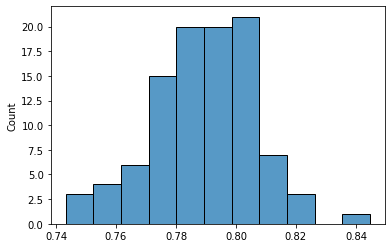

In [ ]:
sns.histplot(x=P_O_given_J1_prob_list)

In [ ]:
stats.ttest_1samp(a=P_O_given_J1_prob_list, popmean=0.79)

Ttest_1sampResult(statistic=-0.47902572268669724, pvalue=0.6329767092396794)

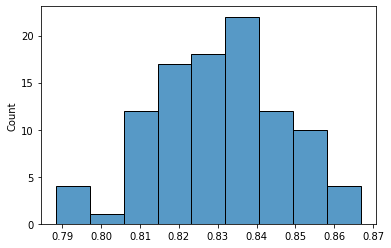

In [ ]:
sns.histplot(x=P_O_given_J2_prob_list)

In [ ]:
stats.ttest_1samp(a=P_O_given_J2_prob_list, popmean=0.83)

Ttest_1sampResult(statistic=0.19921851093698734, pvalue=0.8425004104270297)

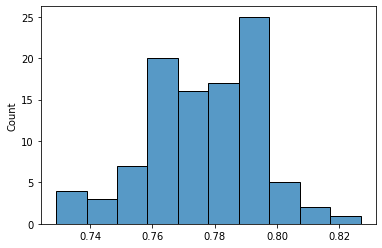

In [ ]:
sns.histplot(x=P_O_given_J1_S1_prob_list)

In [ ]:
stats.ttest_1samp(a=P_O_given_J1_S1_prob_list, popmean=7/9)

Ttest_1sampResult(statistic=-0.6139266890846382, pvalue=0.5406719486721648)

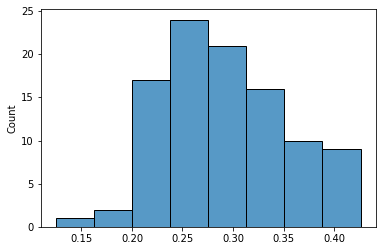

In [ ]:
sns.histplot(x=P_O_given_J2_S1_prob_list)

In [ ]:
stats.ttest_1samp(a=P_O_given_J2_S1_prob_list, popmean=0.3)

Ttest_1sampResult(statistic=-1.0046919595183996, pvalue=0.3174945600630184)

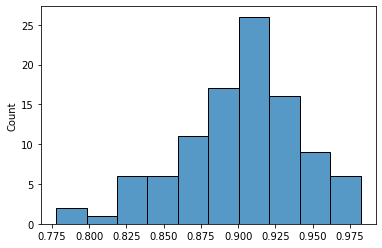

In [ ]:
sns.histplot(x=P_O_given_J1_S2_prob_list)

In [ ]:
stats.ttest_1samp(a=P_O_given_J1_S2_prob_list, popmean=0.9)

Ttest_1sampResult(statistic=0.40609833860308187, pvalue=0.6855467926332186)

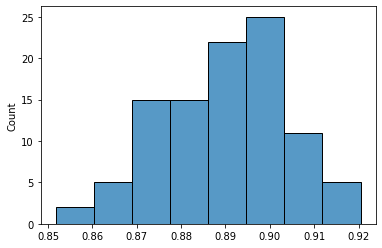

In [ ]:
sns.histplot(x=P_O_given_J2_S2_prob_list)

In [ ]:
stats.ttest_1samp(a=P_O_given_J2_S2_prob_list, popmean=8/9)

Ttest_1sampResult(statistic=0.5531525190763453, pvalue=0.5814059687189188)

P(O|S, J) = 7/9 > P(O|S, J_comp)=3/10

P(O|S_comp, J)=9/10 > P(O|S_comp, J_comp)=8/9

BUT

P(O|J)=0.79 < P(O|J_comp)=0.83